In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 출력 창 청소를 위한 함수
from IPython.display import clear_output

# 저장
import pickle

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation

# 다중 분류를 위한 원핫 인코딩
# 결과데이터의 종류 수 만큼 결과데이터의 컬럼을 늘리는 작업
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 읽어온다.
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint

# 현재 프로젝트를 gpu에 할당한다.
# 컴퓨터의 GPU는 메모리를 가지고 있다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# seed 설정
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
# 데이터를 읽어온다.
df1 = pd.read_csv('data/wine.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# 입력과 결과로 나눈다.
X = df1.drop(12, axis=1)
y = df1[12]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [5]:
# 모델 설정
model = Sequential()

model.add(Dense(30, input_dim=12))
model.add(Activation('relu'))

model.add(Dense(12))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [7]:
history = model.fit(X, y, validation_split=0.2, epochs=2000, batch_size=500)

Epoch 1/2000
11/11 [==============================] - 1s 19ms/step - loss: 0.5371 - accuracy: 0.6479 - val_loss: 0.0917 - val_accuracy: 0.9985
Epoch 2/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.7304 - val_loss: 0.1657 - val_accuracy: 0.9977
Epoch 3/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.3640 - accuracy: 0.8582 - val_loss: 0.2143 - val_accuracy: 0.9777
Epoch 4/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.8915 - val_loss: 0.1856 - val_accuracy: 0.9615
Epoch 5/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9015 - val_loss: 0.1691 - val_accuracy: 0.9662
Epoch 6/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.9032 - val_loss: 0.1797 - val_accuracy: 0.9531
Epoch 7/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.2549 - accuracy: 0.9080 - val_loss: 0.1681 - val_accuracy: 0.9546
Epoch

11/11 [==============================] - 0s 6ms/step - loss: 0.0996 - accuracy: 0.9692 - val_loss: 0.0478 - val_accuracy: 0.9900
Epoch 59/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.1009 - accuracy: 0.9692 - val_loss: 0.0560 - val_accuracy: 0.9869
Epoch 60/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0977 - accuracy: 0.9696 - val_loss: 0.0800 - val_accuracy: 0.9831
Epoch 61/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9708 - val_loss: 0.0591 - val_accuracy: 0.9869
Epoch 62/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0981 - accuracy: 0.9696 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 63/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0991 - accuracy: 0.9683 - val_loss: 0.0803 - val_accuracy: 0.9823
Epoch 64/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.0761 - val_accuracy: 0.9831
Epoch 65/2000

Epoch 115/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 116/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0820 - val_accuracy: 0.9746
Epoch 117/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0483 - val_accuracy: 0.9900
Epoch 118/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0616 - accuracy: 0.9821 - val_loss: 0.0851 - val_accuracy: 0.9746
Epoch 119/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0642 - accuracy: 0.9811 - val_loss: 0.0939 - val_accuracy: 0.9723
Epoch 120/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0648 - accuracy: 0.9821 - val_loss: 0.0514 - val_accuracy: 0.9869
Epoch 121/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9835 - val_loss: 0.0553 - val_accuracy:

Epoch 172/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9865 - val_loss: 0.0649 - val_accuracy: 0.9854
Epoch 173/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9854 - val_loss: 0.0751 - val_accuracy: 0.9831
Epoch 174/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0528 - accuracy: 0.9854 - val_loss: 0.0789 - val_accuracy: 0.9785
Epoch 175/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9850 - val_loss: 0.0588 - val_accuracy: 0.9854
Epoch 176/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.0657 - val_accuracy: 0.9846
Epoch 177/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9865 - val_loss: 0.0607 - val_accuracy: 0.9846
Epoch 178/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.0943 - val_accuracy:

Epoch 229/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0499 - accuracy: 0.9865 - val_loss: 0.0467 - val_accuracy: 0.9885
Epoch 230/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9850 - val_loss: 0.0768 - val_accuracy: 0.9823
Epoch 231/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9861 - val_loss: 0.0664 - val_accuracy: 0.9846
Epoch 232/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0501 - accuracy: 0.9863 - val_loss: 0.0534 - val_accuracy: 0.9885
Epoch 233/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9848 - val_loss: 0.0593 - val_accuracy: 0.9854
Epoch 234/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9867 - val_loss: 0.0630 - val_accuracy: 0.9869
Epoch 235/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9865 - val_loss: 0.0877 - val_accuracy:

Epoch 286/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0551 - val_accuracy: 0.9892
Epoch 287/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.0692 - val_accuracy: 0.9854
Epoch 288/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9852 - val_loss: 0.0913 - val_accuracy: 0.9785
Epoch 289/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9879 - val_loss: 0.0710 - val_accuracy: 0.9862
Epoch 290/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9869 - val_loss: 0.0711 - val_accuracy: 0.9862
Epoch 291/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.9871 - val_loss: 0.0966 - val_accuracy: 0.9777
Epoch 292/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0495 - accuracy: 0.9863 - val_loss: 0.0709 - val_accuracy:

Epoch 343/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0711 - val_accuracy: 0.9900
Epoch 344/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 0.9877 - val_loss: 0.0729 - val_accuracy: 0.9892
Epoch 345/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0429 - accuracy: 0.9883 - val_loss: 0.0611 - val_accuracy: 0.9915
Epoch 346/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0703 - val_accuracy: 0.9908
Epoch 347/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9877 - val_loss: 0.1030 - val_accuracy: 0.9777
Epoch 348/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.1086 - val_accuracy: 0.9769
Epoch 349/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0975 - val_accuracy:

Epoch 400/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.0850 - val_accuracy: 0.9892
Epoch 401/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0740 - val_accuracy: 0.9900
Epoch 402/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.1187 - val_accuracy: 0.9762
Epoch 403/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0883 - val_accuracy: 0.9877
Epoch 404/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0786 - val_accuracy: 0.9900
Epoch 405/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0907 - val_accuracy: 0.9885
Epoch 406/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9890 - val_loss: 0.1173 - val_accuracy:

Epoch 457/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9892 - val_loss: 0.1082 - val_accuracy: 0.9838
Epoch 458/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.1065 - val_accuracy: 0.9823
Epoch 459/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.1002 - val_accuracy: 0.9877
Epoch 460/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.1156 - val_accuracy: 0.9815
Epoch 461/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.9892 - val_loss: 0.1081 - val_accuracy: 0.9846
Epoch 462/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.1198 - val_accuracy: 0.9800
Epoch 463/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.1113 - val_accuracy:

Epoch 514/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0987 - val_accuracy: 0.9892
Epoch 515/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.1059 - val_accuracy: 0.9862
Epoch 516/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.1159 - val_accuracy: 0.9808
Epoch 517/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.1485 - val_accuracy: 0.9746
Epoch 518/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9886 - val_loss: 0.1499 - val_accuracy: 0.9692
Epoch 519/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.1280 - val_accuracy: 0.9792
Epoch 520/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9883 - val_loss: 0.0977 - val_accuracy:

Epoch 571/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0996 - val_accuracy: 0.9908
Epoch 572/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.1151 - val_accuracy: 0.9838
Epoch 573/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.1261 - val_accuracy: 0.9815
Epoch 574/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0351 - accuracy: 0.9911 - val_loss: 0.1130 - val_accuracy: 0.9885
Epoch 575/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.1121 - val_accuracy: 0.9838
Epoch 576/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.1333 - val_accuracy: 0.9769
Epoch 577/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.1243 - val_accuracy:

Epoch 628/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0985 - val_accuracy: 0.9908
Epoch 629/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9910 - val_loss: 0.1068 - val_accuracy: 0.9908
Epoch 630/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9913 - val_loss: 0.1096 - val_accuracy: 0.9908
Epoch 631/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9908 - val_loss: 0.1227 - val_accuracy: 0.9823
Epoch 632/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 0.1344 - val_accuracy: 0.9792
Epoch 633/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.9915 - val_loss: 0.1014 - val_accuracy: 0.9915
Epoch 634/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.1161 - val_accuracy:

Epoch 685/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.1282 - val_accuracy: 0.9823
Epoch 686/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.1085 - val_accuracy: 0.9908
Epoch 687/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.1207 - val_accuracy: 0.9846
Epoch 688/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.9904 - val_loss: 0.1255 - val_accuracy: 0.9831
Epoch 689/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.1178 - val_accuracy: 0.9831
Epoch 690/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 0.1228 - val_accuracy: 0.9846
Epoch 691/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0336 - accuracy: 0.9906 - val_loss: 0.1062 - val_accuracy:

Epoch 742/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.1057 - val_accuracy: 0.9892
Epoch 743/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.1415 - val_accuracy: 0.9823
Epoch 744/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9908 - val_loss: 0.1221 - val_accuracy: 0.9854
Epoch 745/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9919 - val_loss: 0.1272 - val_accuracy: 0.9846
Epoch 746/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.9919 - val_loss: 0.1245 - val_accuracy: 0.9831
Epoch 747/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9929 - val_loss: 0.1083 - val_accuracy: 0.9892
Epoch 748/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9919 - val_loss: 0.1146 - val_accuracy:

Epoch 799/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9917 - val_loss: 0.1371 - val_accuracy: 0.9792
Epoch 800/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.1467 - val_accuracy: 0.9777
Epoch 801/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.1496 - val_accuracy: 0.9738
Epoch 802/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9896 - val_loss: 0.0965 - val_accuracy: 0.9923
Epoch 803/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0916 - val_accuracy: 0.9946
Epoch 804/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0917 - val_accuracy: 0.9946
Epoch 805/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.1031 - val_accuracy:

Epoch 856/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9935 - val_loss: 0.1280 - val_accuracy: 0.9892
Epoch 857/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0287 - accuracy: 0.9927 - val_loss: 0.1261 - val_accuracy: 0.9885
Epoch 858/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9921 - val_loss: 0.1182 - val_accuracy: 0.9900
Epoch 859/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9931 - val_loss: 0.1264 - val_accuracy: 0.9885
Epoch 860/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 0.9931 - val_loss: 0.1293 - val_accuracy: 0.9877
Epoch 861/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 0.1453 - val_accuracy: 0.9823
Epoch 862/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0284 - accuracy: 0.9927 - val_loss: 0.1303 - val_accuracy:

Epoch 913/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9937 - val_loss: 0.1191 - val_accuracy: 0.9908
Epoch 914/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.1465 - val_accuracy: 0.9846
Epoch 915/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9925 - val_loss: 0.1454 - val_accuracy: 0.9831
Epoch 916/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.1542 - val_accuracy: 0.9815
Epoch 917/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.1207 - val_accuracy: 0.9908
Epoch 918/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 0.9923 - val_loss: 0.1428 - val_accuracy: 0.9838
Epoch 919/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.1212 - val_accuracy:

Epoch 970/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9911 - val_loss: 0.1207 - val_accuracy: 0.9900
Epoch 971/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.1144 - val_accuracy: 0.9915
Epoch 972/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.1373 - val_accuracy: 0.9885
Epoch 973/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.1570 - val_accuracy: 0.9792
Epoch 974/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.1342 - val_accuracy: 0.9869
Epoch 975/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.1190 - val_accuracy: 0.9908
Epoch 976/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9921 - val_loss: 0.1361 - val_accuracy:

Epoch 1027/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0280 - accuracy: 0.9923 - val_loss: 0.1539 - val_accuracy: 0.9823
Epoch 1028/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.1728 - val_accuracy: 0.9731
Epoch 1029/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9925 - val_loss: 0.1303 - val_accuracy: 0.9892
Epoch 1030/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.9931 - val_loss: 0.1563 - val_accuracy: 0.9792
Epoch 1031/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9935 - val_loss: 0.1170 - val_accuracy: 0.9908
Epoch 1032/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 0.1377 - val_accuracy: 0.9885
Epoch 1033/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 0.1322 - val_ac

11/11 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9925 - val_loss: 0.1330 - val_accuracy: 0.9885
Epoch 1084/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9946 - val_loss: 0.1398 - val_accuracy: 0.9892
Epoch 1085/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9929 - val_loss: 0.1248 - val_accuracy: 0.9915
Epoch 1086/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9937 - val_loss: 0.1343 - val_accuracy: 0.9877
Epoch 1087/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.9942 - val_loss: 0.1469 - val_accuracy: 0.9854
Epoch 1088/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9940 - val_loss: 0.1344 - val_accuracy: 0.9892
Epoch 1089/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.1400 - val_accuracy: 0.9877
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9938 - val_loss: 0.1469 - val_accuracy: 0.9877
Epoch 1140/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9942 - val_loss: 0.1620 - val_accuracy: 0.9831
Epoch 1141/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.1343 - val_accuracy: 0.9885
Epoch 1142/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9938 - val_loss: 0.1345 - val_accuracy: 0.9892
Epoch 1143/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.1868 - val_accuracy: 0.9677
Epoch 1144/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.1329 - val_accuracy: 0.9892
Epoch 1145/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.1360 - val_accuracy: 0.9892
E

11/11 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9944 - val_loss: 0.1318 - val_accuracy: 0.9900
Epoch 1196/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9938 - val_loss: 0.1369 - val_accuracy: 0.9892
Epoch 1197/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 0.9925 - val_loss: 0.1451 - val_accuracy: 0.9869
Epoch 1198/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0.1303 - val_accuracy: 0.9900
Epoch 1199/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.1336 - val_accuracy: 0.9892
Epoch 1200/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.1336 - val_accuracy: 0.9900
Epoch 1201/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.1439 - val_accuracy: 0.9869
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.1698 - val_accuracy: 0.9838
Epoch 1252/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9937 - val_loss: 0.1819 - val_accuracy: 0.9777
Epoch 1253/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.1426 - val_accuracy: 0.9892
Epoch 1254/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.1585 - val_accuracy: 0.9831
Epoch 1255/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.1500 - val_accuracy: 0.9869
Epoch 1256/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.1172 - val_accuracy: 0.9923
Epoch 1257/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.1445 - val_accuracy: 0.9862
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.1485 - val_accuracy: 0.9877
Epoch 1308/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9950 - val_loss: 0.1390 - val_accuracy: 0.9892
Epoch 1309/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9948 - val_loss: 0.1567 - val_accuracy: 0.9838
Epoch 1310/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.1511 - val_accuracy: 0.9862
Epoch 1311/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0232 - accuracy: 0.9948 - val_loss: 0.1531 - val_accuracy: 0.9854
Epoch 1312/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 0.9933 - val_loss: 0.1311 - val_accuracy: 0.9908
Epoch 1313/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.1406 - val_accuracy: 0.9892
E

11/11 [==============================] - 0s 6ms/step - loss: 0.0227 - accuracy: 0.9944 - val_loss: 0.1467 - val_accuracy: 0.9862
Epoch 1364/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.1305 - val_accuracy: 0.9885
Epoch 1365/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0232 - accuracy: 0.9938 - val_loss: 0.1381 - val_accuracy: 0.9877
Epoch 1366/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9938 - val_loss: 0.1422 - val_accuracy: 0.9869
Epoch 1367/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9935 - val_loss: 0.1224 - val_accuracy: 0.9908
Epoch 1368/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.1580 - val_accuracy: 0.9846
Epoch 1369/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.1461 - val_accuracy: 0.9854
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.9931 - val_loss: 0.1344 - val_accuracy: 0.9885
Epoch 1420/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.1512 - val_accuracy: 0.9846
Epoch 1421/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9954 - val_loss: 0.1286 - val_accuracy: 0.9892
Epoch 1422/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9952 - val_loss: 0.1272 - val_accuracy: 0.9908
Epoch 1423/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9935 - val_loss: 0.1300 - val_accuracy: 0.9877
Epoch 1424/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0220 - accuracy: 0.9948 - val_loss: 0.1377 - val_accuracy: 0.9869
Epoch 1425/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9944 - val_loss: 0.1486 - val_accuracy: 0.9854
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.1378 - val_accuracy: 0.9877
Epoch 1476/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9935 - val_loss: 0.1335 - val_accuracy: 0.9892
Epoch 1477/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.1391 - val_accuracy: 0.9885
Epoch 1478/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.1571 - val_accuracy: 0.9846
Epoch 1479/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9944 - val_loss: 0.1461 - val_accuracy: 0.9877
Epoch 1480/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9946 - val_loss: 0.1510 - val_accuracy: 0.9869
Epoch 1481/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9940 - val_loss: 0.1272 - val_accuracy: 0.9915
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9950 - val_loss: 0.1580 - val_accuracy: 0.9846
Epoch 1532/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9952 - val_loss: 0.1350 - val_accuracy: 0.9892
Epoch 1533/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.1359 - val_accuracy: 0.9900
Epoch 1534/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.9952 - val_loss: 0.1892 - val_accuracy: 0.9808
Epoch 1535/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9944 - val_loss: 0.1564 - val_accuracy: 0.9862
Epoch 1536/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.1603 - val_accuracy: 0.9854
Epoch 1537/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 0.1335 - val_accuracy: 0.9915
E

11/11 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9927 - val_loss: 0.1508 - val_accuracy: 0.9869
Epoch 1588/2000
11/11 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 0.1295 - val_accuracy: 0.9915
Epoch 1589/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 0.9948 - val_loss: 0.1603 - val_accuracy: 0.9846
Epoch 1590/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0205 - accuracy: 0.9950 - val_loss: 0.1314 - val_accuracy: 0.9908
Epoch 1591/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.1356 - val_accuracy: 0.9900
Epoch 1592/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9956 - val_loss: 0.1404 - val_accuracy: 0.9885
Epoch 1593/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9946 - val_loss: 0.1659 - val_accuracy: 0.9846
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9944 - val_loss: 0.1793 - val_accuracy: 0.9823
Epoch 1644/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9950 - val_loss: 0.1543 - val_accuracy: 0.9854
Epoch 1645/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9944 - val_loss: 0.1371 - val_accuracy: 0.9885
Epoch 1646/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.1218 - val_accuracy: 0.9915
Epoch 1647/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9954 - val_loss: 0.1319 - val_accuracy: 0.9908
Epoch 1648/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9950 - val_loss: 0.1557 - val_accuracy: 0.9846
Epoch 1649/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.1286 - val_accuracy: 0.9915
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.1296 - val_accuracy: 0.9915
Epoch 1700/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.1456 - val_accuracy: 0.9885
Epoch 1701/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 0.1604 - val_accuracy: 0.9846
Epoch 1702/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.1442 - val_accuracy: 0.9877
Epoch 1703/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.9958 - val_loss: 0.1412 - val_accuracy: 0.9885
Epoch 1704/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9956 - val_loss: 0.1298 - val_accuracy: 0.9900
Epoch 1705/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.1305 - val_accuracy: 0.9900
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.1233 - val_accuracy: 0.9915
Epoch 1756/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.1521 - val_accuracy: 0.9869
Epoch 1757/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.1406 - val_accuracy: 0.9885
Epoch 1758/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.1626 - val_accuracy: 0.9831
Epoch 1759/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.1345 - val_accuracy: 0.9900
Epoch 1760/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.1358 - val_accuracy: 0.9900
Epoch 1761/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.1432 - val_accuracy: 0.9862
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.1260 - val_accuracy: 0.9900
Epoch 1812/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.1294 - val_accuracy: 0.9892
Epoch 1813/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.1152 - val_accuracy: 0.9908
Epoch 1814/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0227 - accuracy: 0.9937 - val_loss: 0.1182 - val_accuracy: 0.9915
Epoch 1815/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.1275 - val_accuracy: 0.9900
Epoch 1816/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.1260 - val_accuracy: 0.9885
Epoch 1817/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.1400 - val_accuracy: 0.9869
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.1234 - val_accuracy: 0.9915
Epoch 1868/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.1310 - val_accuracy: 0.9877
Epoch 1869/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9960 - val_loss: 0.1439 - val_accuracy: 0.9854
Epoch 1870/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.1245 - val_accuracy: 0.9892
Epoch 1871/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.1232 - val_accuracy: 0.9900
Epoch 1872/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.1558 - val_accuracy: 0.9831
Epoch 1873/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0233 - accuracy: 0.9942 - val_loss: 0.1243 - val_accuracy: 0.9908
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.1189 - val_accuracy: 0.9900
Epoch 1924/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9948 - val_loss: 0.1147 - val_accuracy: 0.9915
Epoch 1925/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.1058 - val_accuracy: 0.9915
Epoch 1926/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.1133 - val_accuracy: 0.9915
Epoch 1927/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9950 - val_loss: 0.1294 - val_accuracy: 0.9869
Epoch 1928/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.1091 - val_accuracy: 0.9915
Epoch 1929/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.1296 - val_accuracy: 0.9885
E

11/11 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.1064 - val_accuracy: 0.9915
Epoch 1980/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9952 - val_loss: 0.0959 - val_accuracy: 0.9915
Epoch 1981/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0189 - accuracy: 0.9952 - val_loss: 0.1120 - val_accuracy: 0.9885
Epoch 1982/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9958 - val_loss: 0.1052 - val_accuracy: 0.9885
Epoch 1983/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.1492 - val_accuracy: 0.9815
Epoch 1984/2000
11/11 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.1229 - val_accuracy: 0.9869
Epoch 1985/2000
11/11 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0925 - val_accuracy: 0.9923
E

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
a1 = history.history['loss']
a2 = history.history['accuracy']
a3 = history.history['val_loss']
a4 = history.history['val_accuracy']

print(pd.Series(a1).mean())
print(pd.Series(a2).mean())
print(pd.Series(a3).mean())
print(pd.Series(a4).mean())

0.0366435334905982
0.9892608164548874
0.12063502578623593
0.9861307689845562


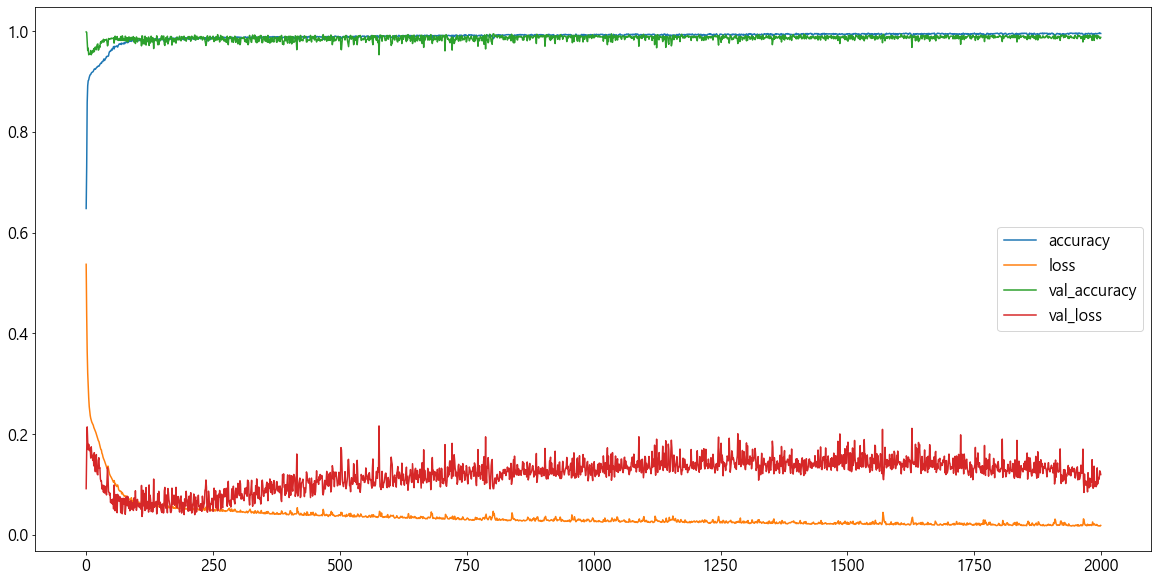

In [16]:
# 오차 정도와 정확도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()